<a href="https://colab.research.google.com/github/TiffanyDegbotse/XAI_assignment2/blob/main/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #00
### Description
### Your Name

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/yourGHName/yourREPOName/blob/yourBranchName/yourFileName.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


In [5]:
!git config --global user.name "Tiffany Degbotse"
!git config --global user.email "tiffanydegbotse123@gmail.com"


In [7]:
# If you haven't cloned before
!git clone https://github.com/TiffanyDegbotse/XAI_assignment2.git

# If you already cloned it, just pull updates
%cd XAI_assignment2
!git pull origin main


Cloning into 'XAI_assignment2'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 6 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 165.65 KiB | 5.52 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/XAI_assignment2
From https://github.com/TiffanyDegbotse/XAI_assignment2
 * branch            main       -> FETCH_HEAD
Already up to date.


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

###Imports

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

###Testing Linear Regression Assumptions

###Assumption 1: Linearity (The relationship between independent (X)and dependent (Y) variables should be linear.)

In [9]:
!ls

README.md  template.ipynb  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [12]:
#Loading Dataset
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
X=data.drop("Churn", axis=1)
Y=data["Churn"]

###Visually inspecting for Linearity using a scatterplot

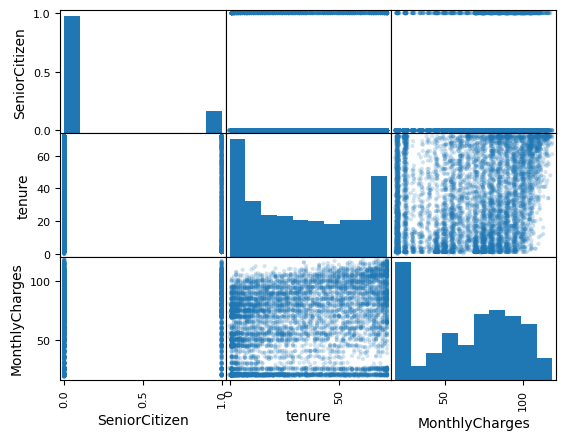

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2)
plt.show()


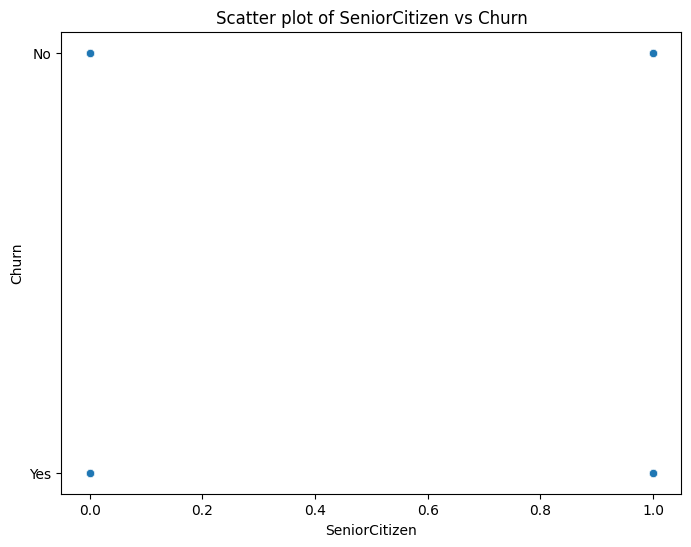

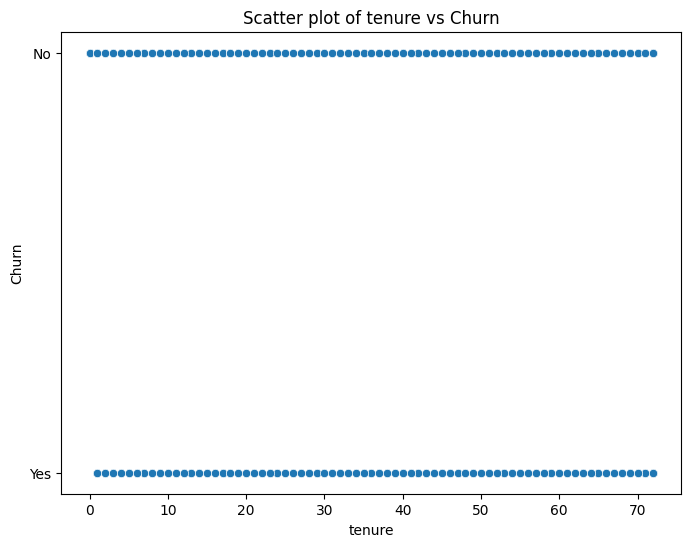

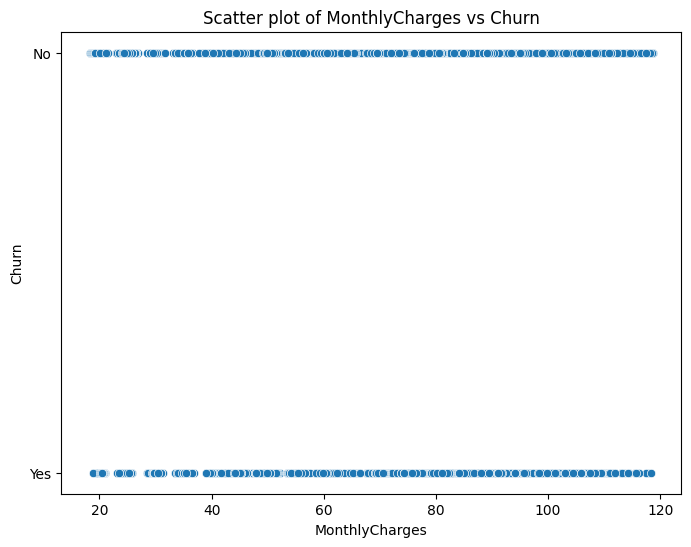

In [17]:
# Create scatter plots for each independent variable against the dependent variable
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']: # Only plot numerical columns
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[col], y=Y)
        plt.title(f'Scatter plot of {col} vs Churn')
        plt.xlabel(col)
        plt.ylabel('Churn')
        plt.show()

###Checking for and filling nan values

In [23]:
null_counts = data.isnull().sum()
print(null_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###Noticed Total Charges was numeric but gave type object when I called .info which meant it likely had emoty inputs hence why it could not scale.

In [26]:
#Changing empty to NAN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [27]:
#Filling the empty input
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())

###Checking if the type of Total Charges has changed

In [29]:
X.info() #It did change now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###Checking for the categorical variables

In [31]:
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [37]:
# Concatenate train and test sets for consistent encoding
X_combined = pd.concat([X_train, X_test], ignore_index=True)

# Identify categorical columns (excluding customerID which was dropped earlier)
categorical_features = X_combined.select_dtypes(include='object').columns

# Apply one-hot encoding to the combined data
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Split the encoded data back into training and testing sets based on original indices
X_train_encoded = X_combined_encoded.iloc[:len(X_train)].reset_index(drop=True)
X_test_encoded = X_combined_encoded.iloc[len(X_train):].reset_index(drop=True)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (5634, 7072)
Shape of X_test_encoded: (1409, 7072)


In [38]:
# Scale the features using the consistently encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (5634, 7072)
Shape of X_test_scaled: (1409, 7072)
